## Contents of the RPS diagnostic

The RPS diagnostic provides different data that has to be fetched from the AUG database.
We will look at each object and see what's what!

In [4]:
from __future__ import print_function
from ipfnpytools.getsig import getsig
from ipfnpytools.closest import closest
import matplotlib.pyplot as plt

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipfnpytools\getsig.py:6: UserWarning: DD library wrapper not available. Importing the dummy version instead
  warnings.warn("DD library wrapper not available. Importing the dummy version instead")


We start by choosing the shot number. The shots for which there is RPS data available can be checked in [this page](https://www.aug.ipp.mpg.de/cgibin/sfread_only/isis)

In [3]:
shotnr = 35835

### Electron density

The most important information provided by the RPS diagnostic is the electron density as a function of time and radial position.

In [3]:
# Electron density at the low field side (LFS)
nelfs = getsig(shotnr, 'RPS', 'neb_LFS')

# Electron density at the high field side (HFS)
nehfs = getsig(shotnr, 'RPS', 'neb_HFS')

### Signal Groups

Signals can be retrieved from the AUG database via python thanks to the [dd library](https://www.aug.ipp.mpg.de/aug/manuals/pylibs/).
Data retrieved with python comes in objects that are instances of the `signalGroup` class.

In [4]:
nelfs

Using the builtin method `___dict__` we can list all the attributes of the `signalGroup` object. 

In [6]:
nelfs.__dict__

{'area': <dd.areaBase at 0x2b5446aff7d0>,
 'data': array([[0.0000000e+00, 3.1011070e+15, 1.2404428e+16, ..., 6.7926645e+19,
         6.8847675e+19, 6.9774902e+19],
        [0.0000000e+00, 3.1011070e+15, 1.2404428e+16, ..., 6.7926645e+19,
         6.8847675e+19, 6.9774902e+19],
        [0.0000000e+00, 3.1011070e+15, 1.2404428e+16, ..., 6.7926645e+19,
         6.8847675e+19, 6.9774902e+19],
        ...,
        [0.0000000e+00, 3.1011070e+15, 1.2404428e+16, ..., 6.7926645e+19,
         6.8847675e+19, 6.9774902e+19],
        [0.0000000e+00, 3.1011070e+15, 1.2404428e+16, ..., 6.7926645e+19,
         6.8847675e+19, 6.9774902e+19],
        [0.0000000e+00, 3.1011070e+15, 1.2404428e+16, ..., 6.7926645e+19,
         6.8847675e+19, 6.9774902e+19]], dtype=float32),
 'header': <dd.signalGroupHeader at 0x2b543934c790>,
 'name': 'neb_LFS',
 'time': array([1.1780000e-04, 2.5780001e-04, 3.9780000e-04, ..., 6.3261576e+00,
        6.3262978e+00, 6.3264380e+00], dtype=float32),
 'unit': '10e19/m^'}

We see that there are some trivial attributes such as `unit` and `name`. The `header` attribute contains some metadata about the object, and then there are three other attributes `area`, `data`, and `time` that hold the information about the electron density. 

The attribute `data`, as the name suggests, contains the data that corresponds to the `name`. It contains the values of electron density as a function of time and radial position. In this case, `data` is a 2d array with shape `(45189, 151)`

The attribute `time` is a 1d array with size `45189` and it is the first index of the `data` 2d array.

In [23]:
print("shape of data is: ", nelfs.data.shape)
print("shape of time is: ", nelfs.time.shape)

shape of data is:  (45189, 151)
shape of time is:  (45189,)


Lastly, `area` is an instance of the class `areaBase` which itself has an attribute called `data` (very confusing I know... wasn't me who did it)

The bottom line is that `nelfs.area.data` is a 2d array with the same shape as `nelfs.data` that contains the radial positions corresponding to the densities stored in `nelfs.data` for each time instant in `nelfs.time`.

In [24]:
print("shape of area is: ", nelfs.area.data.shape)

shape of area is:  (45189, 151)


### Plotting the Electron Density

Let's put this to practice and plot the electron density for a given time instant in the middle of the shot.

Time instant is: 2.8001177 s


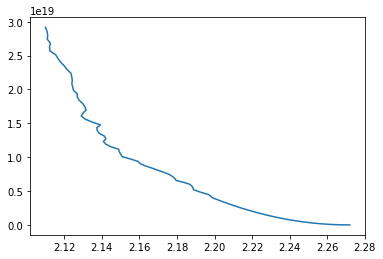

In [33]:
index = 20000  # Time index
print("Time instant is:", nelfs.time[index], "s")

plt.plot(nelfs.area.data[index], nelfs.data[index])

### RPS complete shotfile 

The data provided by each diagnostic is stored in what is called a shotfile. Besides the electron density, each RPS shotfile also contains the following objects: 

In [77]:
# Electron density at the high field side (HFS)
nehfs = getsig(shotnr, 'RPS', 'neb_HFS')

# Electron density at the low field side (LFS)
nelfs = getsig(shotnr, 'RPS', 'neb_LFS')

# Shortcut to the time axis
time = getsig(shotnr, 'RPS', 'TIME')

# I don't know what is this...
ts06 = getsig(shotnr, 'RPS', 'TS06')

# Shortcut to nehfs.area
rhfs = getsig(shotnr, 'RPS', 'RB_HFS')

# Shortcut to nelfs.area
rlfs = getsig(shotnr, 'RPS', 'RB_LFS')

# Same has rhfs, but in terms of probing frequency instead of density
fphfs = getsig(shotnr, 'RPS', 'FP_HFS')

# Same has rlfs, but in terms of probing frequency instead of density
fplfs = getsig(shotnr, 'RPS', 'FP_LFS')

# Group delay as a function of time and frequency (HFS)
gdhfs = getsig(shotnr, 'RPS', 'GD_HFS')

# Group delay as a function of time and frequency (LFS)
gdlfs = getsig(shotnr, 'RPS', 'GD_LFS')

In [93]:
gdhfs.area.data

array([[0.00e+00, 5.00e+08, 1.00e+09, ..., 7.40e+10, 7.45e+10, 7.50e+10],
       [0.00e+00, 5.00e+08, 1.00e+09, ..., 7.40e+10, 7.45e+10, 7.50e+10],
       [0.00e+00, 5.00e+08, 1.00e+09, ..., 7.40e+10, 7.45e+10, 7.50e+10],
       ...,
       [0.00e+00, 5.00e+08, 1.00e+09, ..., 7.40e+10, 7.45e+10, 7.50e+10],
       [0.00e+00, 5.00e+08, 1.00e+09, ..., 7.40e+10, 7.45e+10, 7.50e+10],
       [0.00e+00, 5.00e+08, 1.00e+09, ..., 7.40e+10, 7.45e+10, 7.50e+10]],
      dtype=float32)

Besides the physical quantities described above, the shotfile also contains other useful information

In [72]:
# Dictionary with useful information
info = getsig(shotnr, 'RPS', 'AuxInfo')

print(info)

print("info['dt_sweep']:", info['dt_sweep'].__dict__)

print("info['z_hfs']:", info['z_hfs'].__dict__)

print("info['z_lfs']:", info['z_lfs'].__dict__)

# Probably the most relevant information is the z-coordinate of the density measurements
print("Height on HFS:", info['z_hfs'].data, info['z_hfs'].unit)
print("Height on LFS:", info['z_lfs'].data, info['z_lfs'].unit)

{'dt_sweep': <dd.parameter object at 0x2b5439eca250>, 'z_hfs': <dd.parameter object at 0x2b5439eca410>, 'z_lfs': <dd.parameter object at 0x2b5439eca2d0>}
info['dt_sweep']: {'unit': '', 'data': 0.0, 'name': 'dt_sweep', 'setName': 'AuxInfo'}
info['z_hfs']: {'unit': 'm', 'data': 0.07, 'name': 'z_hfs', 'setName': 'AuxInfo'}
info['z_lfs']: {'unit': 'm', 'data': 0.14, 'name': 'z_lfs', 'setName': 'AuxInfo'}
Height on HFS: 0.07 m
Height on LFS: 0.14 m
